In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/concertriccir2.csv')

In [3]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


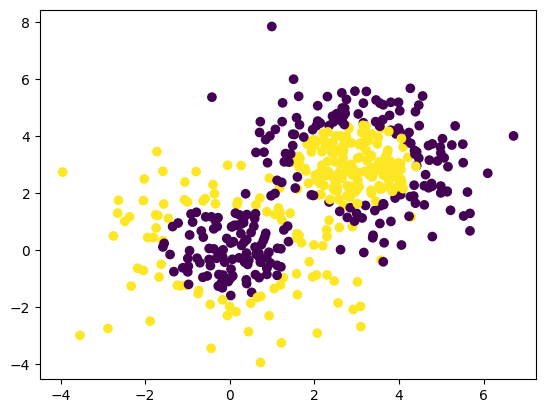

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

#Without Batch normalize

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6791 - accuracy: 0.5625 - val_loss: 0.6556 - val_accuracy: 0.6100
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5600 - val_loss: 0.6543 - val_accuracy: 0.6200
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6796 - accuracy: 0.5575 - val_loss: 0.6581 - val_accuracy: 0.6100
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.5625 - val_loss: 0.6527 - val_accuracy: 0.6300
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.5625 - val_loss: 0.6527 - val_accuracy: 0.6300
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.5625 - val_loss: 0.6534 - val_accuracy: 0.6300
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5650 - val_loss: 0.6566 - val_accuracy: 0.6100
Epoch 8/200
1

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

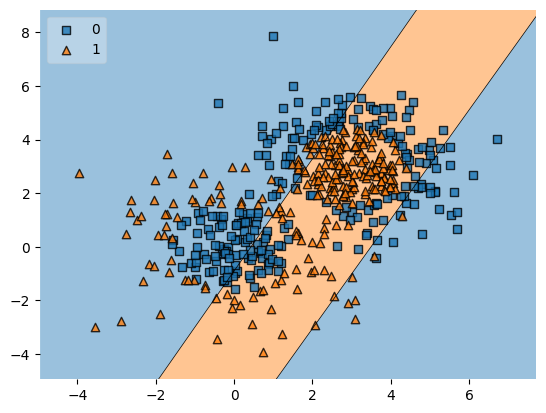

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

#With Batch normalize

In [16]:
df = pd.read_csv('/content/concertriccir2.csv')
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [17]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization()) # 3 * 4 (	trainable_para =(γ, β ) ,untrainable_para(μ, σ) ) = 12
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())# 2 * 4 = 8
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization_2 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_3 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 23ms/step - loss: 0.8991 - accuracy: 0.4625 - val_loss: 0.7329 - val_accuracy: 0.3400
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8507 - accuracy: 0.4675 - val_loss: 0.7381 - val_accuracy: 0.3400
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8432 - accuracy: 0.4625 - val_loss: 0.7434 - val_accuracy: 0.3600
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8548 - accuracy: 0.4525 - val_loss: 0.7450 - val_accuracy: 0.3600
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8007 - accuracy: 0.4750 - val_loss: 0.7462 - val_accuracy: 0.3900
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7985 - accuracy: 0.4700 - val_loss: 0.7491 - val_accuracy: 0.4400
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8119 - accuracy: 0.4750 - val_loss: 0.7510 - val_accuracy: 0.4600
Epoch 8/200


9600/9600 [==============================] - 16s 2ms/step


<Axes: >

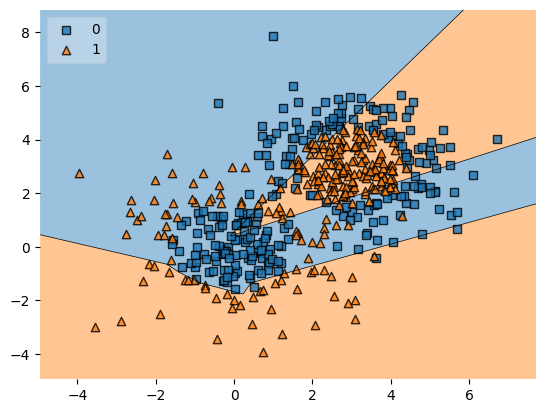

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

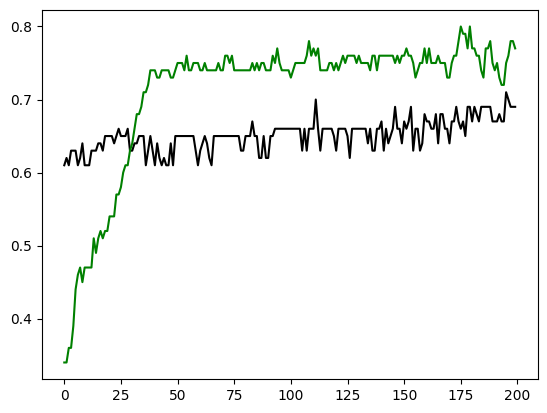

In [21]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')